In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

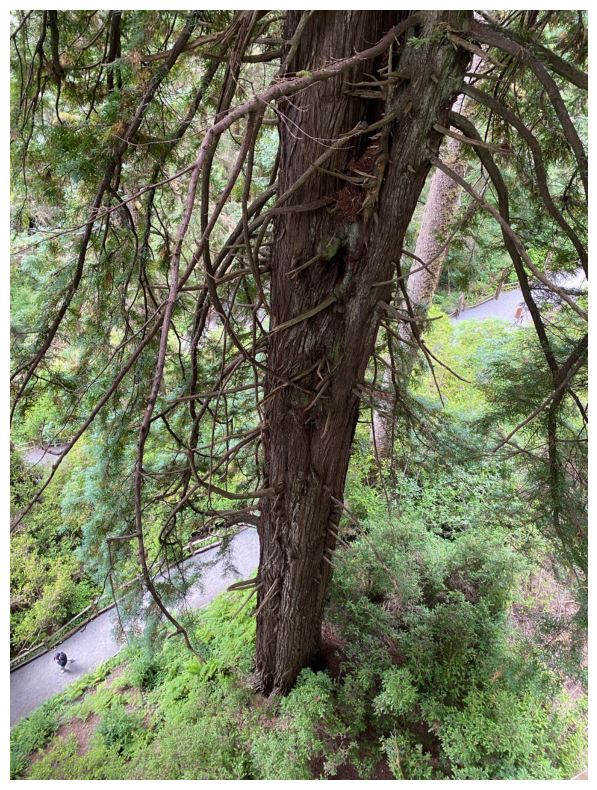

In [19]:


# 1. Read the image as RGB
image = cv2.imread('C:/aravindsir/ass-2/dataset/img1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2. Find pixels where the intensity of the green channel is greater than red and blue
blue_channel = image_rgb[:, :, 2]
green_channel = image_rgb[:, :, 1]
red_channel = image_rgb[:, :, 0]

# Create a mask where green is dominant
mask = (green_channel > red_channel) & (green_channel > blue_channel)

# 3. Convert the image to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# 4. Increase the saturation of those pixels
hue, saturation, value = cv2.split(image_hsv)

# Apply changes to the masked pixels
saturation[mask] = np.clip(saturation[mask] * 1.5, 0, 255)  # Increase saturation

# Merge channels and convert back to RGB
enhanced_image_hsv = cv2.merge([hue, saturation, value])
enhanced_image_rgb = cv2.cvtColor(enhanced_image_hsv, cv2.COLOR_HSV2RGB)

# Display the enhanced image
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(enhanced_image_rgb)
plt.axis('off')

plt.show()
